In [1]:
import sys
sys.path.append(sys.path[0] + '/bin')

In [2]:
import PyMorpionSolitaire

In [3]:
from PIL import Image

Display module information:

In [4]:
# help(PyMorpionSolitaire)

Create a new game with default type (5 points in a line, touching allowed, starting configuration 'cross'):

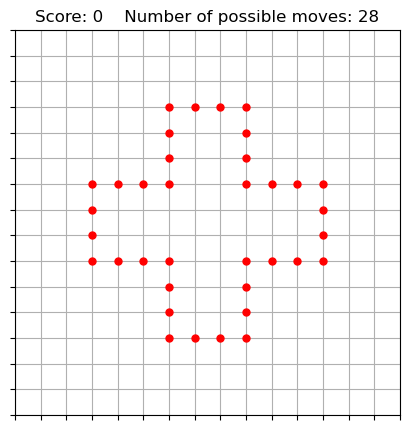

In [5]:
game = PyMorpionSolitaire.Game5T('c')
game.print()

Play a specific move:

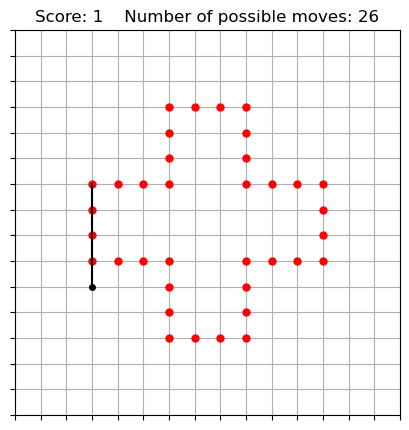

In [6]:
game.playByIndex(0)
game.print()

Play a move at random:

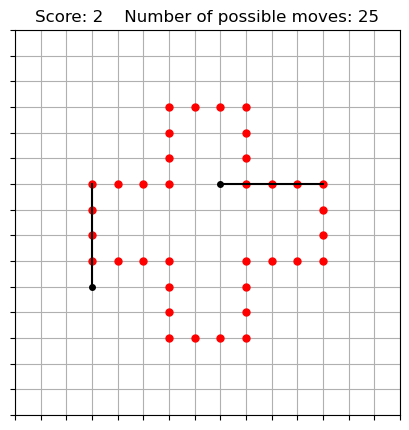

In [7]:
game.playAtRandom(1)
game.print()

Play several moves at random:

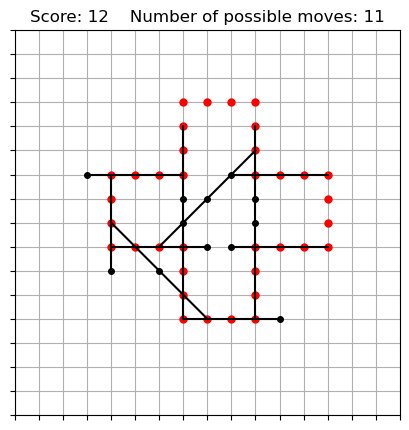

In [8]:
game.playAtRandom(10)
game.print()

Play at random until no more moves are possible:

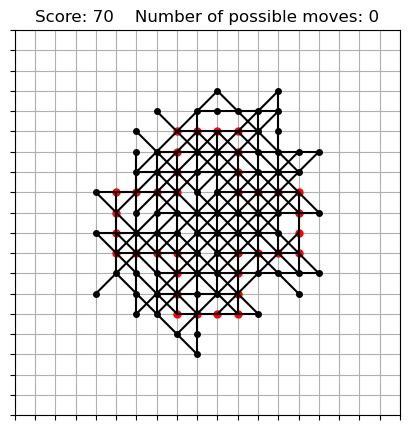

In [9]:
game.playAtRandom()
game.print()

Save game:

In [10]:
game.save('data/test_game.json')

Undo one move:

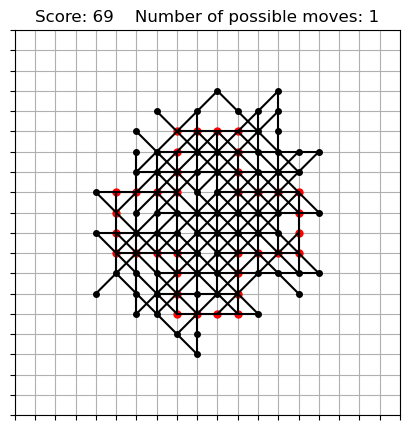

In [11]:
game.undo()
game.print()

Undo more moves:

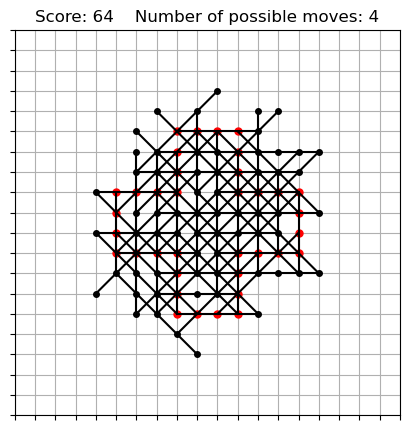

In [12]:
game.undo(5)
game.print()

Explore how many moves can still be made:

In [13]:
game.exploreDepth(5)

5

In [14]:
game.exploreDepth(10)

6

Load a previously saved game:

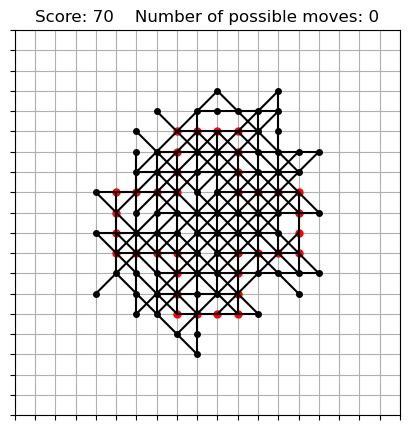

In [15]:
game = PyMorpionSolitaire.Game5T.load('data/test_game.json')
game.print()

The state of the game is stored in a boolean array of size 192 x 192:

In [16]:
game.image().shape

(192, 192)

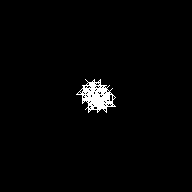

In [17]:
Image.fromarray(game.image())

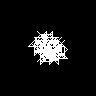

In [18]:
Image.fromarray(game.image()[48:144, 48:144])

Undo all moves to return to the starting grid:

In [19]:
game.undoAll()

Get images of all possible moves:

In [20]:
moveImages = game.getMoveImages()
moveImages.shape

(28, 192, 192)

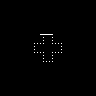

In [21]:
Image.fromarray(moveImages[0, 48:144, 48:144])

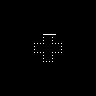

In [22]:
Image.fromarray(moveImages[1, 48:144, 48:144])

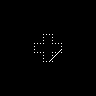

In [23]:
Image.fromarray(moveImages[-1, 48:144, 48:144])

A particula move can be highlighted with:

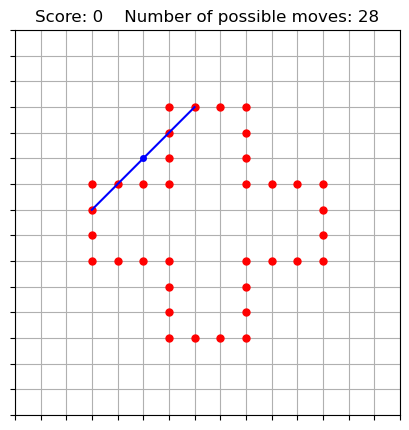

In [26]:
game.undoAll()
game.printMove(24)

Forbid a particular move forever:

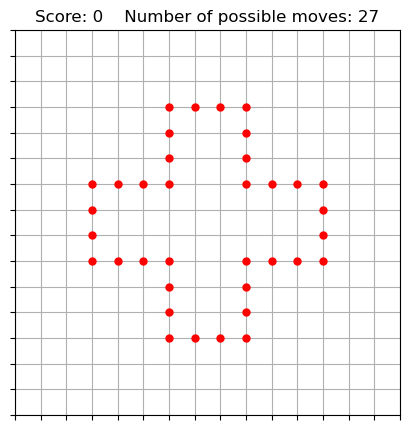

In [27]:
game.deleteMoveByIndex(24)
game.print()

The deleted move will never be playable again:

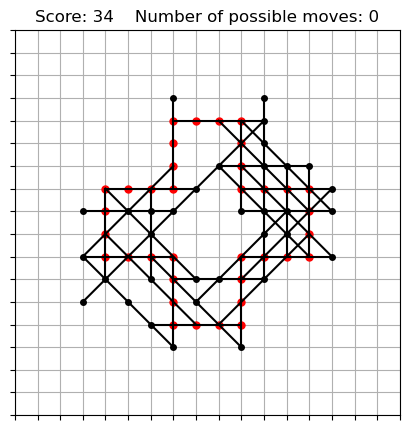

In [28]:
game.playAtRandom()
game.print()

Even after returing to the start grid, only 27 out of usual 28 moves are playable:

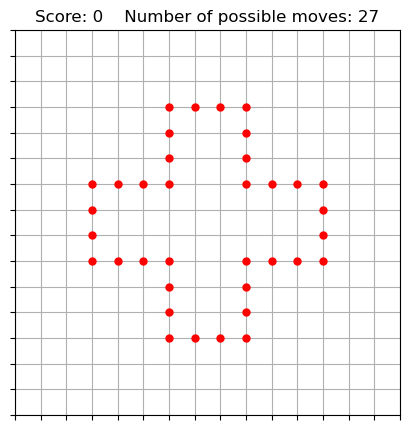

In [29]:
game.undoAll()
game.print()

To reset the game and recover all deleted moves, use the following:

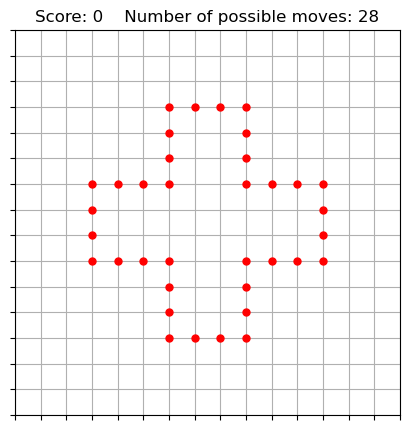

In [30]:
game.restart()
game.print()

Play using the nested Monte-Carlo algorithm:

CPU times: user 98.4 ms, sys: 3.68 ms, total: 102 ms
Wall time: 99.1 ms


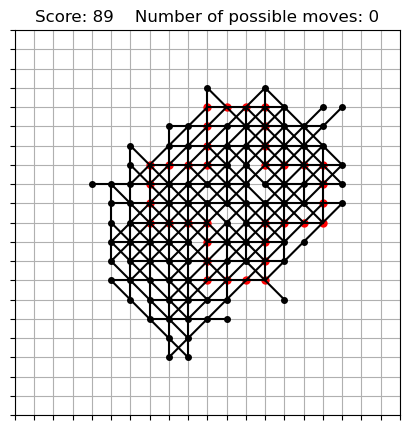

In [31]:
%%time
game.playNestedMC(1)
game.print()

CPU times: user 141 ms, sys: 4.29 ms, total: 145 ms
Wall time: 140 ms


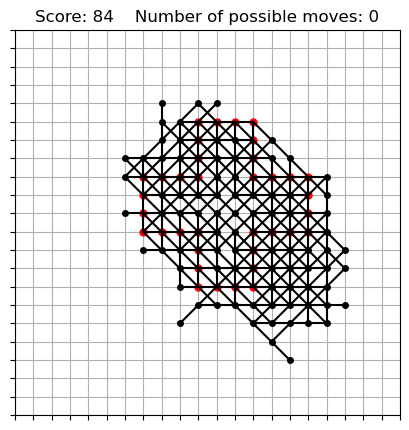

In [32]:
%%time
game.undoAll()
game.playFastNestedMC(1)
game.print()

CPU times: user 4.41 s, sys: 24.7 ms, total: 4.44 s
Wall time: 4.37 s


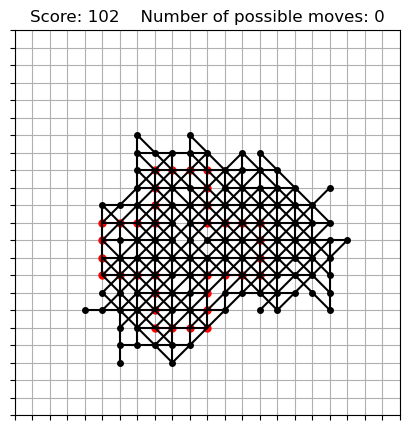

In [31]:
%%time
game.undoAll()
game.playNestedMC(2)
game.print()

CPU times: user 2.22 s, sys: 16.1 ms, total: 2.24 s
Wall time: 2.21 s


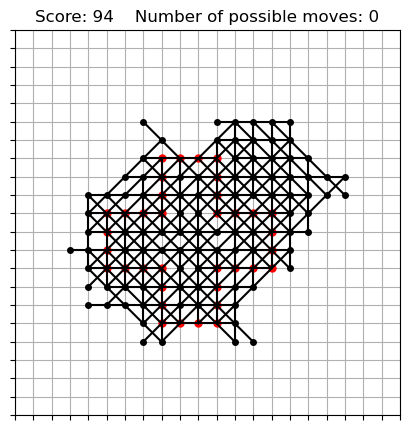

In [32]:
%%time
game.undoAll()
game.playFastNestedMC(2)
game.print()

CPU times: user 16min 17s, sys: 5.15 s, total: 16min 22s
Wall time: 16min 9s


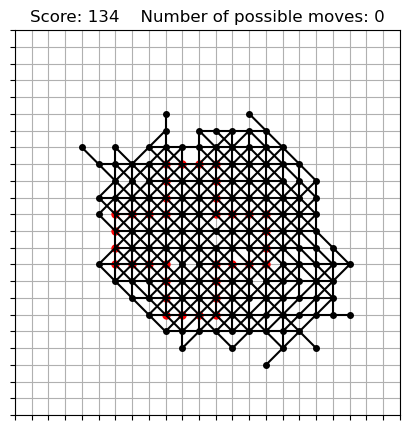

In [33]:
%%time
game.undoAll()
game.playNestedMC(3)
game.print()

CPU times: user 11min 18s, sys: 3.89 s, total: 11min 21s
Wall time: 11min 12s


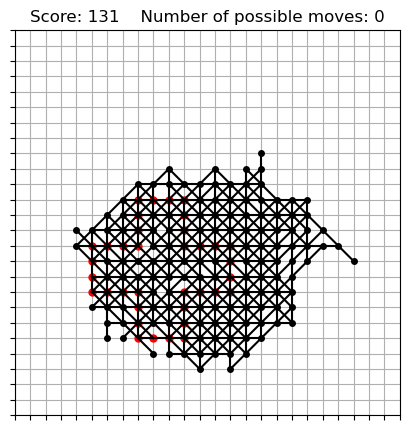

In [34]:
%%time
game.undoAll()
game.playFastNestedMC(3)
game.print()

In [35]:
# game.save('data/highest_score.json')

In [36]:
# %%time
# game.restart()
# game.playNestedMCVariant(4)
# game.print()

Best games obtained so far:

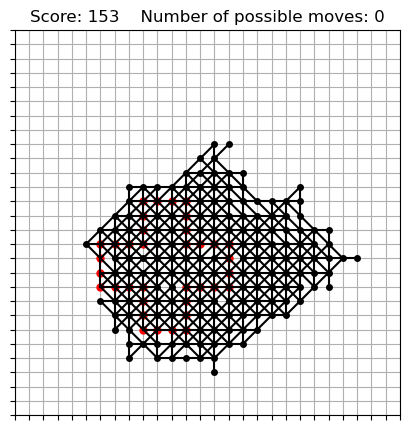

In [37]:
best_cross = PyMorpionSolitaire.Game5T.load('data/nested-4-games/cross5T_153_54955.json')
best_cross.print()

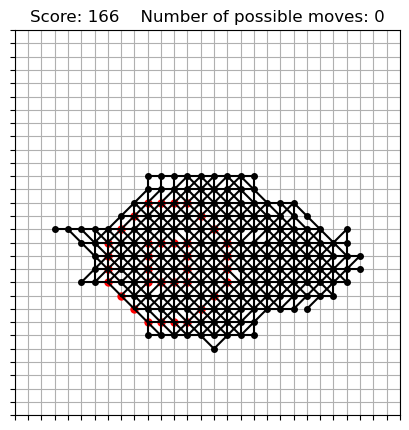

In [38]:
best_pipe = PyMorpionSolitaire.Game5T.load('data/nested-4-games/pipe5T_166_07475.json')
best_pipe.print()

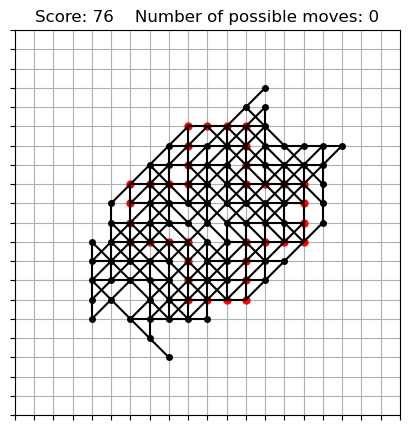

In [39]:
best_cross_D = PyMorpionSolitaire.Game5D.load('data/nested-4-games/cross5D_076_61986.json')
best_cross_D.print()